# Task: Electricity Demand Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
dataset_train = pd.read_csv('Elec_Demand_train.csv')

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

## Data Preprocessing

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, len(training_set)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [6]:
# Reshaping,
# NOTE: Keras expect data in the form of [batch_size, Time_steps, sequence_length]
#             sometimes refer to as [batch_size, timesteps, units]
#             or in other word  [No_samples, No_datapoints_in_time, No_featuers]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


## Part 2 - Building the RNN

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras

In [8]:
# Initialising the RNN
my_regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
my_regressor.add(LSTM(units = 30, return_sequences = True,
                      input_shape = (x_train.shape[1], 1)))
my_regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#my_regressor.add(LSTM(units = 50, return_sequences = True))
#my_regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#my_regressor.add(LSTM(units = 50, return_sequences = True))
#my_regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
my_regressor.add(LSTM(units = 30))
my_regressor.add(Dropout(0.2))

# Adding the output layer
my_regressor.add(Dense(units = 1))

# Compiling the RNN
my_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',
                     metrics = ['accuracy'])

C:\Users\Rober\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Fitting the RNN to the Training set
history = my_regressor.fit(x_train, y_train, epochs = 100,
                           batch_size = 32)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 2.3871e-04 - loss: 0.1277
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 3.8949e-04 - loss: 0.0381
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0019 - loss: 0.0175
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 5.9432e-04 - loss: 0.0117
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 9.7371e-04 - loss: 0.0095
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.4267e-04 - loss: 0.0087
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0013 - loss: 0.0083
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0013 - loss: 0.0074
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0011 - loss: 0.0067
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.6244e-04 - loss: 0.0066
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 4.6979e-04 - loss: 0.0067
Epoch 12/100
83/83 ━━━━━

In [10]:
my_regressor.save('demand.h5')

## Part 3 - Making the predictions and visualising the results

In [11]:

dataset_test = pd.read_csv('Elec_Demand_test.csv')


real_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Demand'], dataset_test['Demand']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = my_regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


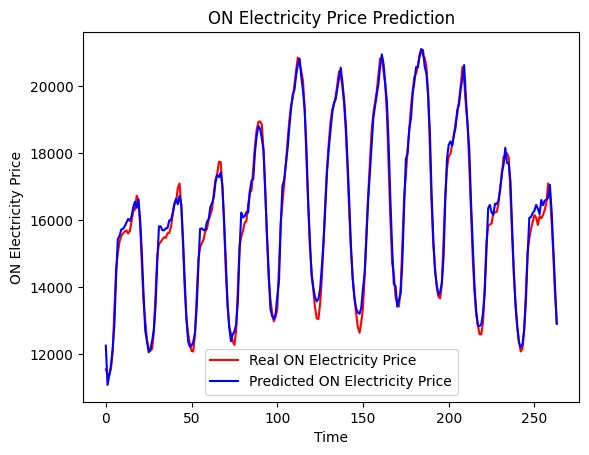

In [12]:
# Visualising the results
plt.plot(real_price, color = 'red', label = 'Real ON Electricity Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted ON Electricity Price')
plt.title('ON Electricity Price Prediction')
plt.xlabel('Time')
plt.ylabel('ON Electricity Price')
plt.legend()
plt.show()

In [13]:
# list all the data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss'])
